# Лабораторная работа 3. Обучение с учителем. Задача регрессии

**ЗАДАНИЕ**

1. Загрузить датасет "Стоимость дома в Мумбаи" для решения задачи регрессии, выполнить предварительную обработку и разведочный анализ данных (EDA).
2. Выделить целевой признак и предикторы, разбить данные на обучающую и тестовую выборку.
3. Решить задачу регрессии на ваших данных с использованием моделей sklearn (простая линейная регрессия + L1, L2; множественная линейная регрессия + L1, L2), для моделей с регуляризациями подберите гиперпараметр.
4. Решить задачу регрессии на ваших данных с использованием моделей sklearn (Полиномиальная регрессия + L1, L2), для моделей с регуляризациями подберите гиперпараметр.
5. Вычислить значения метрик R2, MAE, MSE, RMSE, MAPE для всех обученных моделей. Выбрать лучшую модель.
6. Реализовать пайплайн при построении модели регрессии.
7. *Самостоятельно реализовать вычисление всех используемых метрик (в виде функций, принимающих два аргумента). Привести в таблице метрики, вычисленные с использование библиотеки Scikit-learn и соответствующими пользовательскими функциями.
8. Решить задачу регрессии на ваших данных с использованием моделей sklearn (простая линейная регрессия + L1, L2, ElasticNet; множественная линейная регрессия + L1, L2, ElasticNet), для моделей с регуляризациями подберите гиперпараметр. Применить горячее кодирование (Pandas).
9. Вычислить значения метрик R2, MAE, MSE, RMSE, MAPE для всех обученных моделей. Выбрать лучшую модель.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

In [3]:
df = pd.read_csv('C:/Users/seito/Jupyter Notebook/data/mumbai_houses_task.csv')

<function matplotlib.pyplot.show(close=None, block=None)>

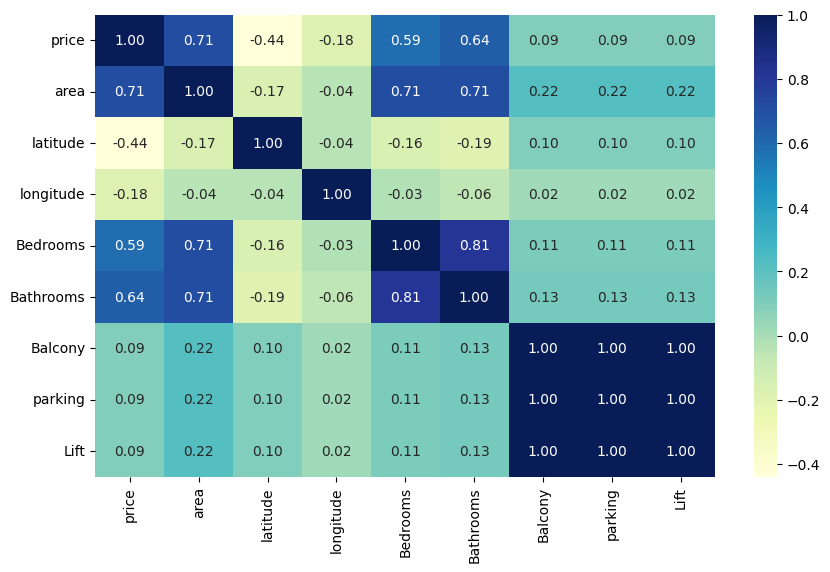

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.show

In [7]:
df.head()

,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,type_of_building
0,22400000.0,629.0,19.032800,72.896357,2.0,2.0,0.0,Under Construction,New Property,0.0,NaN,0.0,Flat
1,35000000.0,974.0,19.032800,72.896357,3.0,2.0,0.0,Under Construction,New Property,0.0,NaN,0.0,Flat
2,31700000.0,968.0,19.085600,72.909277,3.0,3.0,0.0,Under Construction,New Property,0.0,NaN,0.0,Flat
3,18700000.0,629.0,19.155756,72.846862,2.0,2.0,2.0,Ready to Move,New Property,2.0,NaN,2.0,Flat
4,13500000.0,1090.0,19.177555,72.849887,2.0,2.0,0.0,NaN,New Property,0.0,Unfurnished,0.0,Flat


## Предварительная обработка (DataPreprocessing) и разведочный анализ данных (EDA)

In [8]:
df.describe()

,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,parking,Lift
count,6.255000e+03,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000
mean,2.684187e+07,1185.625260,19.156772,72.868642,2.452278,2.425580,0.821583,0.821583,0.821583
std,2.788831e+07,636.973259,0.109447,0.058614,0.749534,0.762604,1.291957,1.291957,1.291957
min,1.500000e+06,503.000000,18.873713,72.754080,2.000000,0.000000,0.000000,0.000000,0.000000
25%,1.300000e+07,846.500000,19.081509,72.832930,2.000000,2.000000,0.000000,0.000000,0.000000
50%,1.900000e+07,1000.000000,19.147269,72.858019,2.000000,2.000000,0.000000,0.000000,0.000000
75%,3.000000e+07,1300.000000,19.213054,72.884691,3.000000,3.000000,1.000000,1.000000,1.000000
max,3.600000e+08,8000.000000,19.476239,73.197823,10.000000,10.000000,8.000000,8.000000,8.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             6255 non-null   float64
 1   area              6255 non-null   float64
 2   latitude          6255 non-null   float64
 3   longitude         6255 non-null   float64
 4   Bedrooms          6255 non-null   float64
 5   Bathrooms         6255 non-null   float64
 6   Balcony           6255 non-null   float64
 7   Status            5774 non-null   object 
 8   neworold          6255 non-null   object 
 9   parking           6255 non-null   float64
 10  Furnished_status  3600 non-null   object 
 11  Lift              6255 non-null   float64
 12  type_of_building  6255 non-null   object 
dtypes: float64(9), object(4)
memory usage: 635.4+ KB


In [10]:
renamed_columns = {}
for column in df.columns:
    renamed_columns[column] = column.title().strip()
df = df.rename(columns = renamed_columns)
df.head()

,Price,Area,Latitude,Longitude,Bedrooms,Bathrooms,Balcony,Status,Neworold,Parking,Furnished_Status,Lift,Type_Of_Building
0,22400000.0,629.0,19.032800,72.896357,2.0,2.0,0.0,Under Construction,New Property,0.0,NaN,0.0,Flat
1,35000000.0,974.0,19.032800,72.896357,3.0,2.0,0.0,Under Construction,New Property,0.0,NaN,0.0,Flat
2,31700000.0,968.0,19.085600,72.909277,3.0,3.0,0.0,Under Construction,New Property,0.0,NaN,0.0,Flat
3,18700000.0,629.0,19.155756,72.846862,2.0,2.0,2.0,Ready to Move,New Property,2.0,NaN,2.0,Flat
4,13500000.0,1090.0,19.177555,72.849887,2.0,2.0,0.0,NaN,New Property,0.0,Unfurnished,0.0,Flat


In [11]:
for i in df.columns[df.dtypes==object]:
    print("\n",i,"\n")
    print(df[i].unique())
    print(df[i].value_counts())


 Status 

['Under Construction' 'Ready to Move' nan]
Ready to Move         5771
Under Construction       3
Name: Status, dtype: int64

 Neworold 

['New Property' 'Resale']
Resale          5515
New Property     740
Name: Neworold, dtype: int64

 Furnished_Status 

[nan 'Unfurnished' 'Semi-Furnished' 'Furnished']
Unfurnished       1384
Semi-Furnished    1195
Furnished         1021
Name: Furnished_Status, dtype: int64

 Type_Of_Building 

['Flat' 'Individual House']
Flat                5828
Individual House     427
Name: Type_Of_Building, dtype: int64


In [12]:
df.groupby(['Neworold','Status'])['Status'].count()

Neworold      Status            
New Property  Ready to Move          511
              Under Construction       3
Resale        Ready to Move         5260
Name: Status, dtype: int64

3/6255 строк в столбце 'Status' принимает значение 'Under Construction', все остальные строки заполнены 'Ready to Move'. Столбец 'Status' бессмысленный, удалим его

In [13]:
df.drop(['Status'], axis=1, inplace=True)

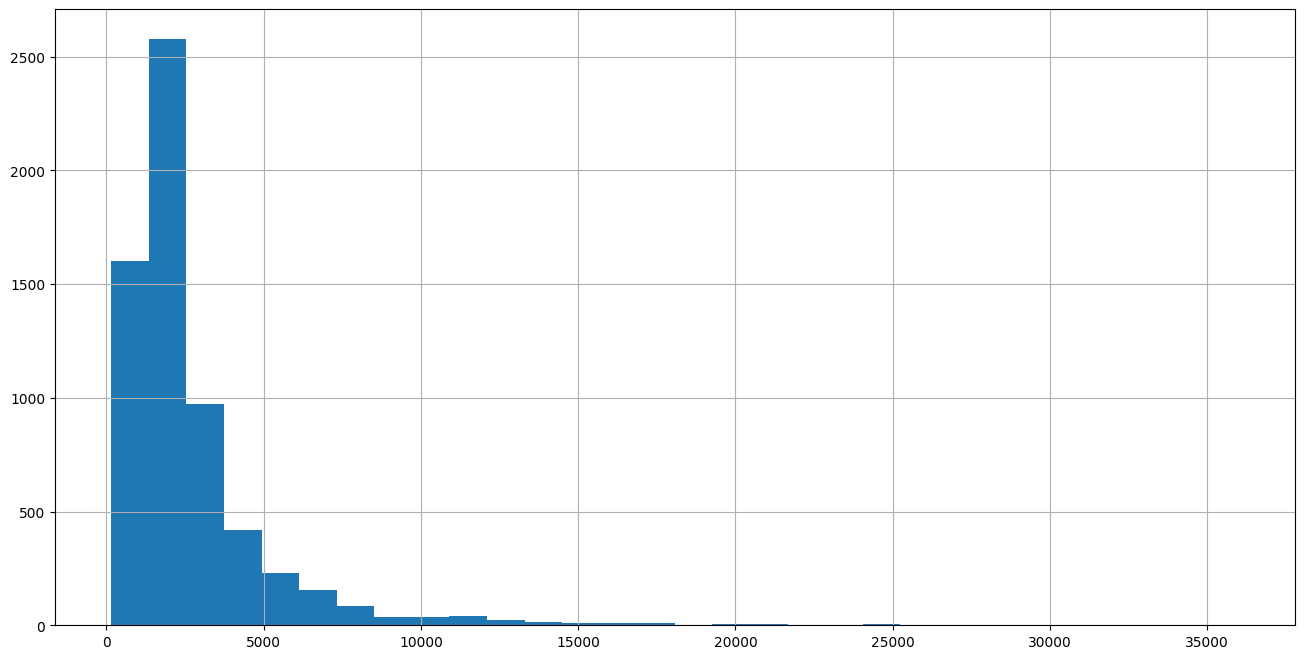

In [14]:
df.Price=df.Price/10000
# df=df[df.Price<150000]

df['Price'].hist(bins=30, figsize=(16, 8))
plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             6255 non-null   float64
 1   Area              6255 non-null   float64
 2   Latitude          6255 non-null   float64
 3   Longitude         6255 non-null   float64
 4   Bedrooms          6255 non-null   float64
 5   Bathrooms         6255 non-null   float64
 6   Balcony           6255 non-null   float64
 7   Neworold          6255 non-null   object 
 8   Parking           6255 non-null   float64
 9   Furnished_Status  3600 non-null   object 
 10  Lift              6255 non-null   float64
 11  Type_Of_Building  6255 non-null   object 
dtypes: float64(9), object(3)
memory usage: 586.5+ KB


In [16]:
df.isna().sum()

Price                  0
Area                   0
Latitude               0
Longitude              0
Bedrooms               0
Bathrooms              0
Balcony                0
Neworold               0
Parking                0
Furnished_Status    2655
Lift                   0
Type_Of_Building       0
dtype: int64

In [17]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=False)

Furnished_Status    0.42446
Price               0.00000
Area                0.00000
Latitude            0.00000
Longitude           0.00000
Bedrooms            0.00000
Bathrooms           0.00000
Balcony             0.00000
Neworold            0.00000
Parking             0.00000
Lift                0.00000
Type_Of_Building    0.00000
dtype: float64

<AxesSubplot: title={'center': 'Price'}, xlabel='Furnished_Status'>

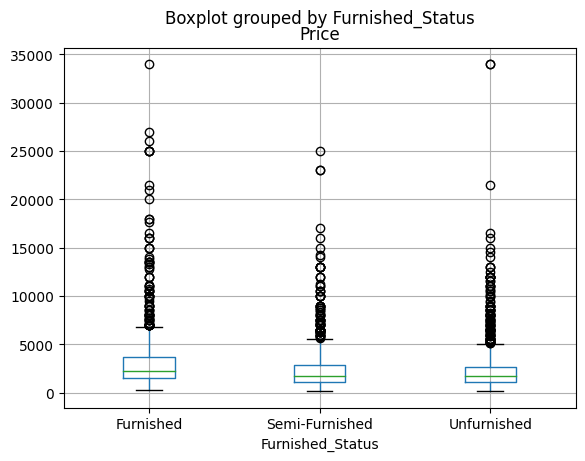

In [18]:
df.boxplot(by='Furnished_Status', column = 'Price', grid=True)

In [19]:
group_f_status = df.groupby('Furnished_Status')['Price'].mean().reset_index()
group_f_status

,Furnished_Status,Price
0,Furnished,3251.571009
1,Semi-Furnished,2442.553975
2,Unfurnished,2390.496387


Нет нормальных способов заменить пропущенные значения в столбце `Furnished_Status`

In [20]:
df.describe(include = 'object')

,Neworold,Furnished_Status,Type_Of_Building
count,6255,3600,6255
unique,2,3,2
top,Resale,Unfurnished,Flat
freq,5515,1384,5828


In [21]:
df.Neworold.replace(['Resale', 'New Property'], [0, 1], inplace=True)
df.Furnished_Status.replace(['Semi-Furnished', 'Unfurnished', 'Furnished'],[1,0,2],inplace=True)
df.fillna(0, inplace = True)
df.Type_Of_Building.replace(["Flat","Individual House"],[0,1],inplace=True)


x = lambda x: 1 if x > 0 else 0
df.Lift = df.Lift.apply(x)
df.Parking = df.Parking.apply(x)

In [22]:
df.head()

,Price,Area,Latitude,Longitude,Bedrooms,Bathrooms,Balcony,Neworold,Parking,Furnished_Status,Lift,Type_Of_Building
0,2240.0,629.0,19.032800,72.896357,2.0,2.0,0.0,1,0,0.0,0,0
1,3500.0,974.0,19.032800,72.896357,3.0,2.0,0.0,1,0,0.0,0,0
2,3170.0,968.0,19.085600,72.909277,3.0,3.0,0.0,1,0,0.0,0,0
3,1870.0,629.0,19.155756,72.846862,2.0,2.0,2.0,1,1,0.0,1,0
4,1350.0,1090.0,19.177555,72.849887,2.0,2.0,0.0,1,0,0.0,0,0


In [23]:
columns_to_int = ['Bedrooms', 'Bathrooms', 'Balcony', 'Furnished_Status']
df[columns_to_int] = df[columns_to_int].astype(int)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             6255 non-null   float64
 1   Area              6255 non-null   float64
 2   Latitude          6255 non-null   float64
 3   Longitude         6255 non-null   float64
 4   Bedrooms          6255 non-null   int32  
 5   Bathrooms         6255 non-null   int32  
 6   Balcony           6255 non-null   int32  
 7   Neworold          6255 non-null   int64  
 8   Parking           6255 non-null   int64  
 9   Furnished_Status  6255 non-null   int32  
 10  Lift              6255 non-null   int64  
 11  Type_Of_Building  6255 non-null   int64  
dtypes: float64(4), int32(4), int64(4)
memory usage: 488.8 KB


### Изучение и обработка выбросов

In [25]:
# df = pd.read_csv('C:/Users/seito/Jupyter Notebook/data/mumbai_houses_task.csv')
# df.drop(['Status'], axis=1, inplace=True)

In [26]:
# renamed_columns = {}
# for column in df.columns:
#     renamed_columns[column] = column.title().strip()
# df = df.rename(columns = renamed_columns)

# # Return all columns with String
# object_df = df.select_dtypes(include='object')
# # Return all columns with Numerical Values
# numeric_df = df.select_dtypes(exclude='object')
# aaa = ['Bedrooms', 'Bathrooms','Balcony', 'Parking', 'Lift']
# numeric_df[aaa] = numeric_df[aaa].astype(int)
# # Replace with dummy variables
# df_objects_dummies = pd.get_dummies(object_df, dtype=int)
# # Concatenate the object with string to complete the dataframe
# df = pd.concat([numeric_df,df_objects_dummies], axis=1)
# df.head()

In [27]:
df.describe()

,Price,Area,Latitude,Longitude,Bedrooms,Bathrooms,Balcony,Neworold,Parking,Furnished_Status,Lift,Type_Of_Building
count,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000
mean,2684.187370,1185.625260,19.156772,72.868642,2.452278,2.425580,0.821583,0.118305,0.379856,0.517506,0.379856,0.068265
std,2788.831071,636.973259,0.109447,0.058614,0.749534,0.762604,1.291957,0.322995,0.485390,0.759108,0.485390,0.252221
min,150.000000,503.000000,18.873713,72.754080,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1300.000000,846.500000,19.081509,72.832930,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1900.000000,1000.000000,19.147269,72.858019,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3000.000000,1300.000000,19.213054,72.884691,3.000000,3.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,36000.000000,8000.000000,19.476239,73.197823,10.000000,10.000000,8.000000,1.000000,1.000000,2.000000,1.000000,1.000000


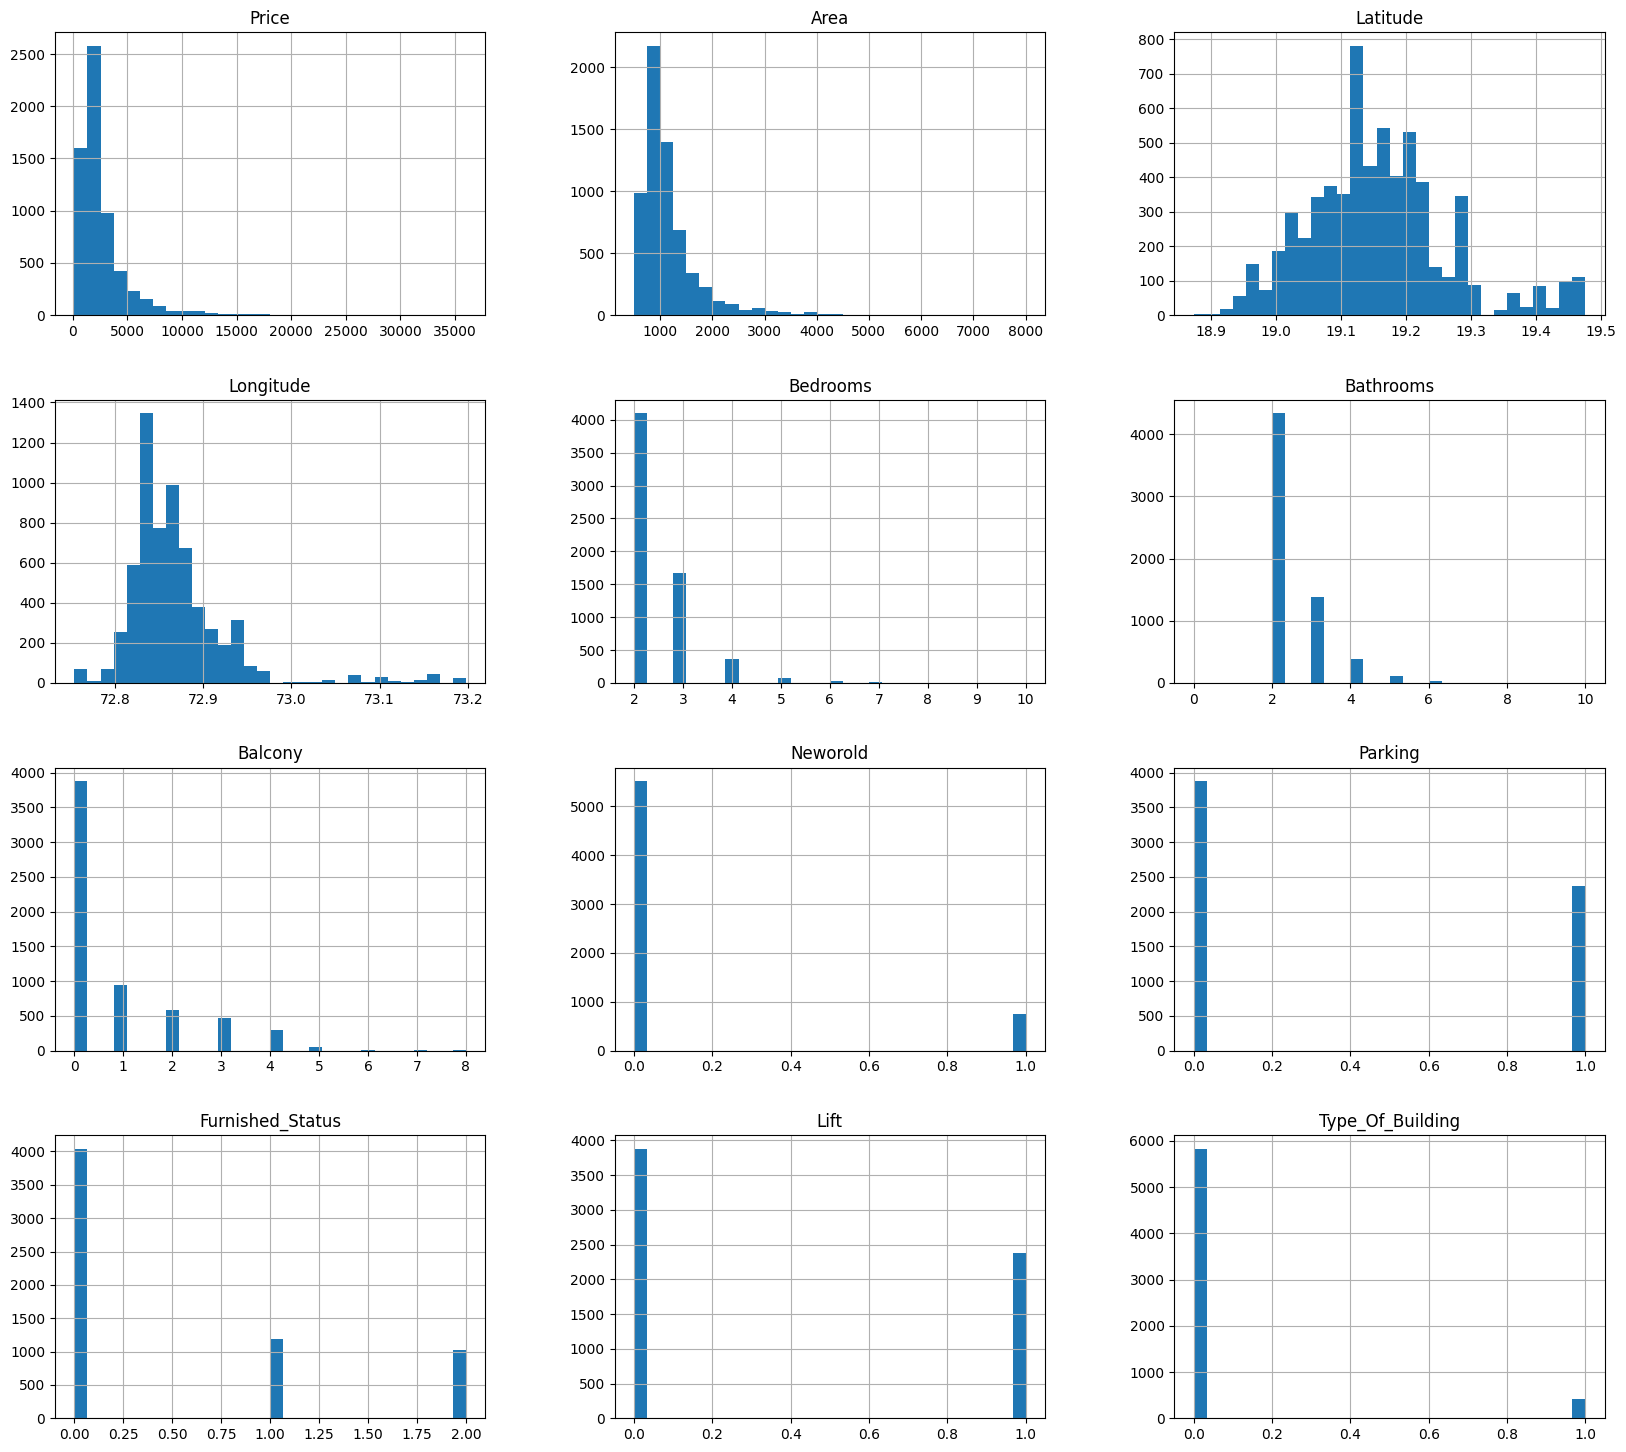

In [28]:
df.hist(bins=30,figsize=(20,18))
plt.show()

In [29]:
# outlier = df[['Price', 'Area']]

# Q1 = outlier.quantile(0.25)
# Q3 = outlier.quantile(0.75)
# # IQR-оценки
# IQR = Q3-Q1
# # Отфильтрованные данные, из которых удалены выбросы
# data_filtered = outlier[~((outlier < (Q1 - 1.5 * IQR)) |(outlier > (Q3 + 1.5 * IQR))).any(axis=1)]

# # Копирование индексов
# index_list = list(data_filtered.index.values)
# # Хранить данные без выбросов в отдельном DataFrame.
# df = df[df.index.isin(index_list)]
# df

714 cтрок не будем удалять, становится толкьо хуже.

In [ ]:
df.to_csv("c:/Users/seito/Jupyter Notebook/data/dataset3_with_EDA", index=False)

## Выделение целевого признака и предикторов, разделение данных на обучающую и тестовую выборки.

In [27]:
df.head()

,Price,Area,Latitude,Longitude,Bedrooms,Bathrooms,Balcony,Neworold,Parking,Furnished_Status,Lift,Type_Of_Building
0,2240.0,629.0,19.032800,72.896357,2,2,0,1,0,0,0,0
1,3500.0,974.0,19.032800,72.896357,3,2,0,1,0,0,0,0
2,3170.0,968.0,19.085600,72.909277,3,3,0,1,0,0,0,0
3,1870.0,629.0,19.155756,72.846862,2,2,2,1,1,0,1,0
4,1350.0,1090.0,19.177555,72.849887,2,2,0,1,0,0,0,0


<function matplotlib.pyplot.show(close=None, block=None)>

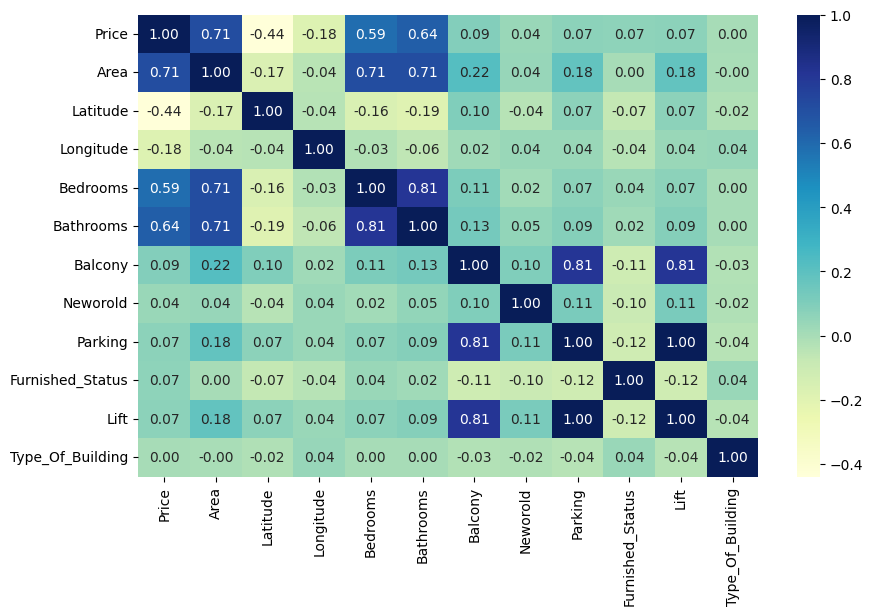

In [28]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.show

C:\Users\seito\Jupyter Notebook\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\seito\Jupyter Notebook\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\seito\Jupyter Notebook\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\seito\Jupyter Notebook\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

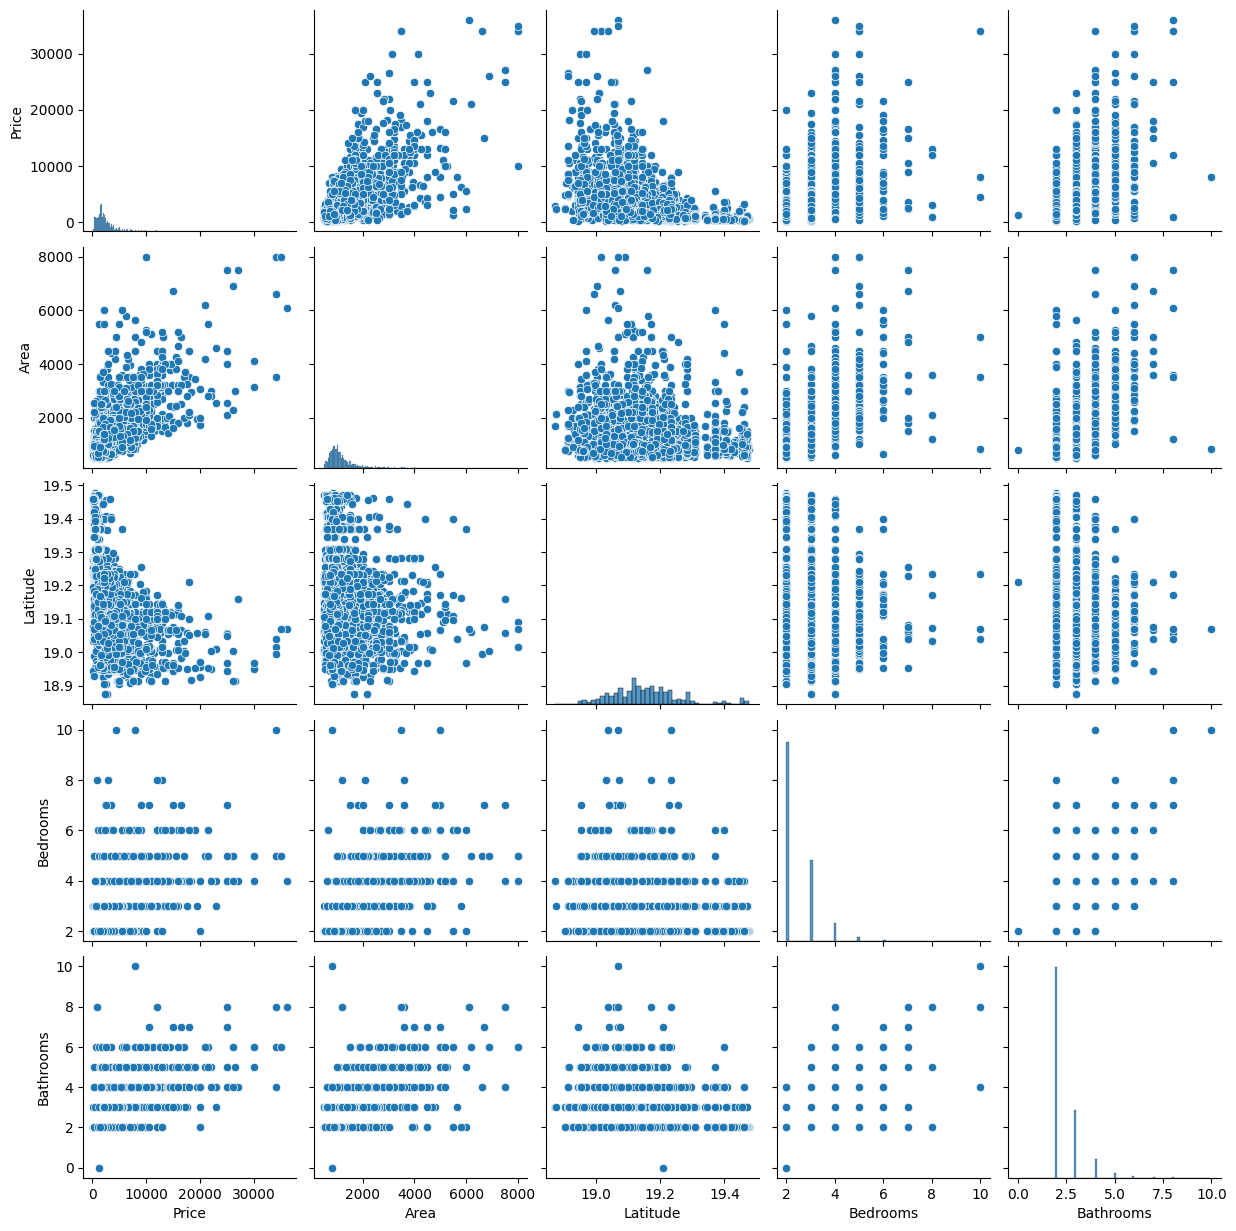

In [29]:
l=['Price', 'Area', 'Latitude', 'Bedrooms', 'Bathrooms']
sns.pairplot(df[l])

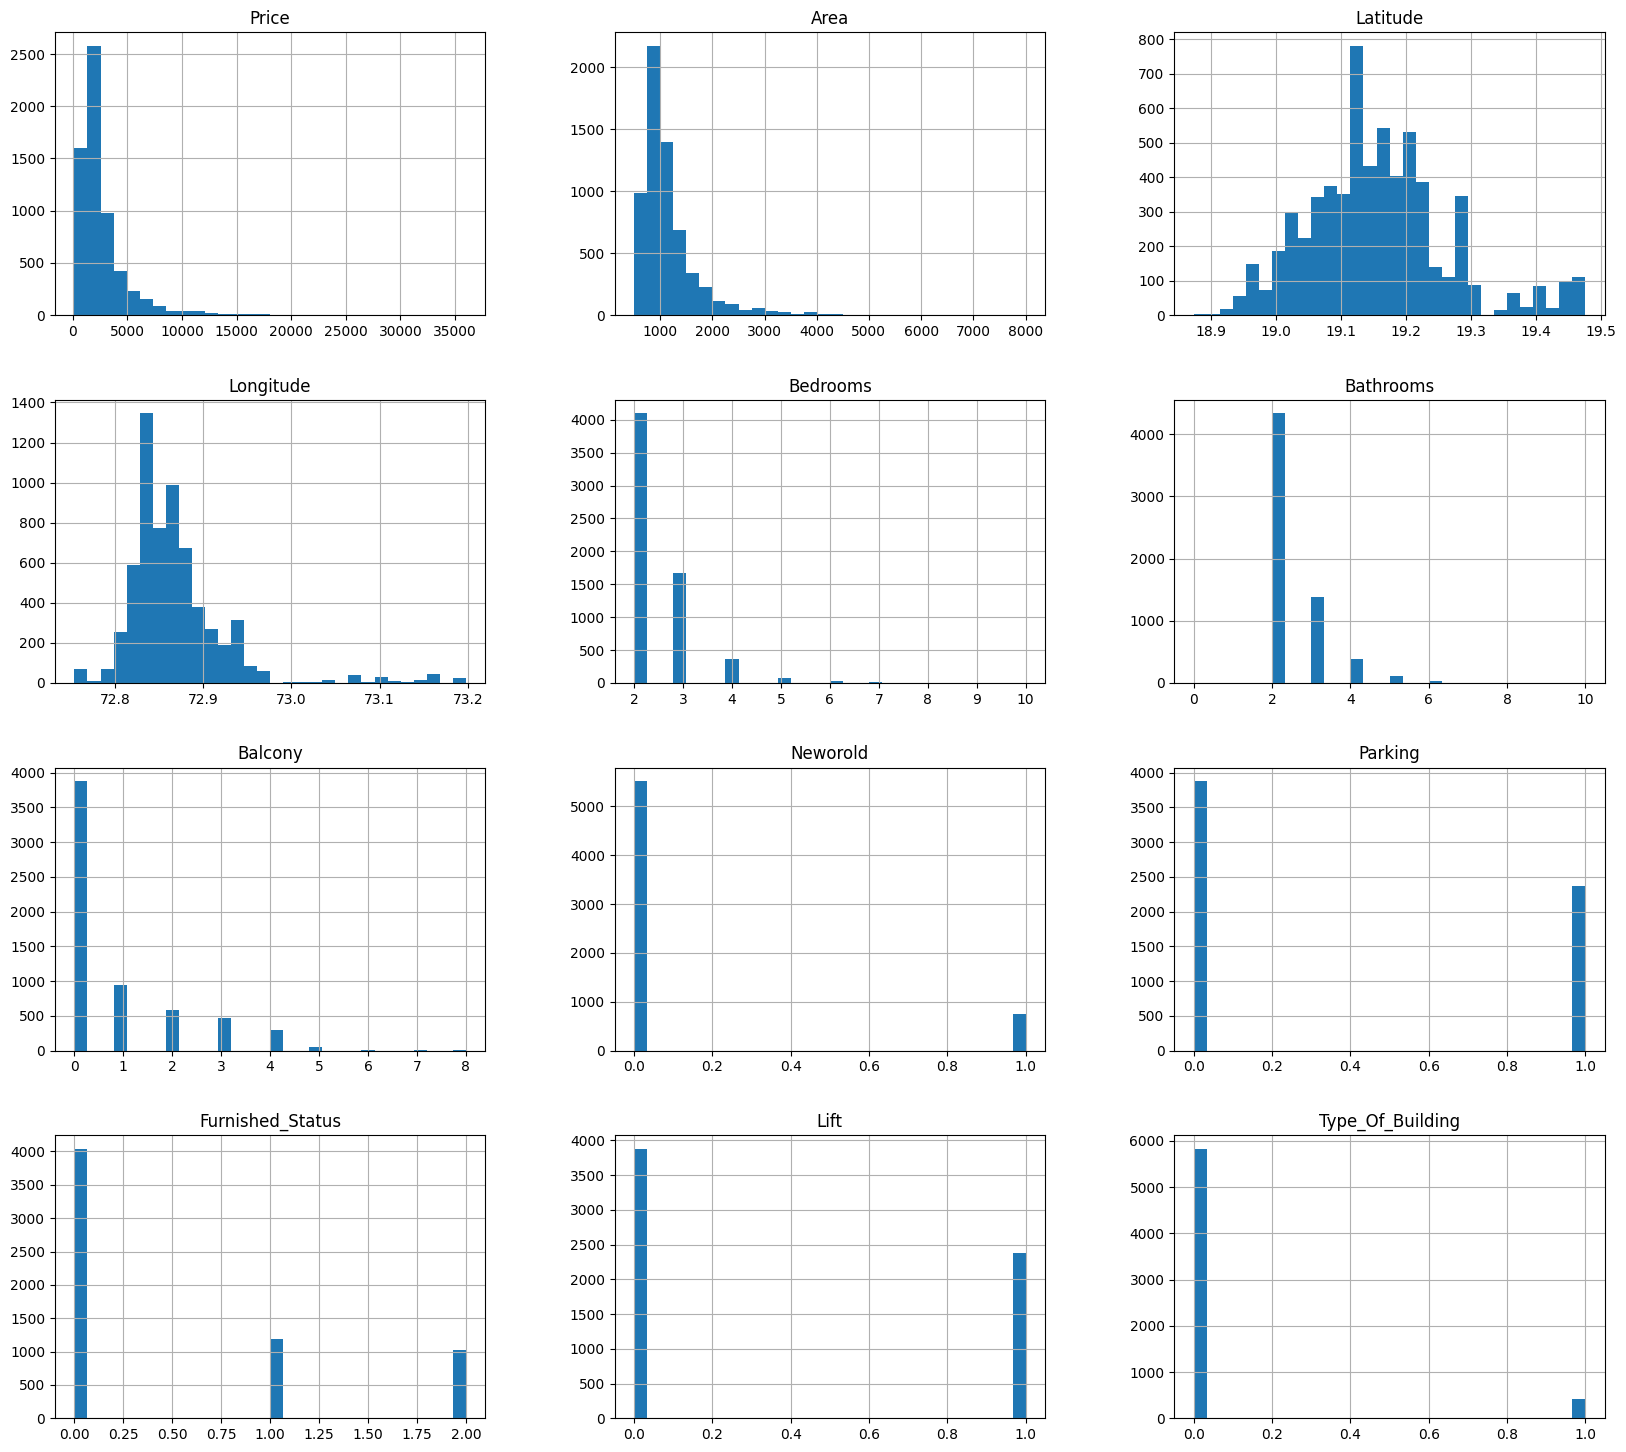

In [30]:
df.hist(bins=30,figsize=(20,18))
plt.show()

P-значение — значение вероятности того, что корреляция между этими двумя переменными является статистически значимой. Определим, когда корреляция между зависимой переменной «Цена» и независимыми переменными является статистически значимой.

In [31]:
# Import из scipy библиотеки модуль stats
from scipy import stats

col_list = df.columns.to_list()[1:]
Y = df['Price']
for x_pearson in col_list:
  pearson_coef, p_value = stats.pearsonr(df[x_pearson], Y)
  print(x_pearson)
  print('Коэффициент корреляции Пирсона = ', pearson_coef, ' P-значение = ', p_value)
  print('')

Area
Коэффициент корреляции Пирсона =  0.7122704885461263  P-значение =  0.0

Latitude
Коэффициент корреляции Пирсона =  -0.4392639902183498  P-значение =  1.906751901482261e-293

Longitude
Коэффициент корреляции Пирсона =  -0.1823082168588655  P-значение =  7.00040655727689e-48

Bedrooms
Коэффициент корреляции Пирсона =  0.5864443844187966  P-значение =  0.0

Bathrooms
Коэффициент корреляции Пирсона =  0.6391799029265264  P-значение =  0.0

Balcony
Коэффициент корреляции Пирсона =  0.09463963338121877  P-значение =  6.369388733507172e-14

Neworold
Коэффициент корреляции Пирсона =  0.037077908884369626  P-значение =  0.0033585454968206732

Parking
Коэффициент корреляции Пирсона =  0.07113281821702142  P-значение =  1.7833599598600997e-08

Furnished_Status
Коэффициент корреляции Пирсона =  0.06569898063043732  P-значение =  1.986266972081795e-07

Lift
Коэффициент корреляции Пирсона =  0.07113281821702142  P-значение =  1.7833599598600997e-08

Type_Of_Building
Коэффициент корреляции Пирс

Итак, максимальная корреляция между перменной `Price` и независимыми переменными наблюдается в столбце `Area`. Результирующий коэффициент = 0,71 и есть убедительные доказательства того, что эта корреляция значительна

### Шаг № 1: выделение целевого признака и предикторов

In [32]:
y = df['Price']
X = df['Area'].to_numpy().reshape(-1,1)

In [33]:
y

0       2240.0
1       3500.0
2       3170.0
3       1870.0
4       1350.0
         ...  
6250    1950.0
6251    2200.0
6252    2000.0
6253    1100.0
6254    1500.0
Name: Price, Length: 6255, dtype: float64

In [34]:
X

array([[629.],
       [974.],
       [968.],
       ...,
       [750.],
       [700.],
       [900.]])

### Шаг № 2: разделение данных на обучающую и тестовую выборки

**Обучать модели** будем на наборах X_train и y_train. А **оценивать** их качество на наборах X_test и y_test.

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = False, random_state=0)

In [36]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5004, 1), (5004,), (1251, 1), (1251,))

## Simple Linear Regression (простая линейная регрессия) + L1, L2

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


# Печать точки пересечения и коэффициента линейной регрессии
pd.DataFrame([lin_reg.coef_[0], lin_reg.intercept_], index=['coefficient', 'intercept'], columns=['Simple Linear Regression'])

,Simple Linear Regression
coefficient,3.055724
intercept,-971.803856


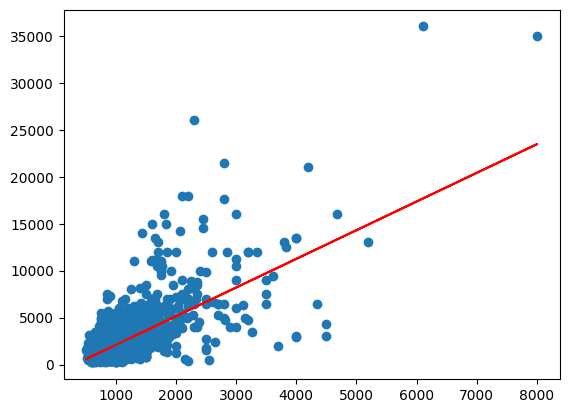

In [39]:
y_pred = lin_reg.predict(X_test)

plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred, 'r')

**Метрики качества:**

$ MAE=\frac{1}{m}{\sum_{i=1}^{m}|y_i-\hat{y}_i|} $

$ MSE=\frac{1}{m}{\sum_{i=1}^{m}(y_i-\hat{y}_i)^2} $

$ RMSE=\sqrt{\frac{1}{m}{\sum_{i=1}^{m}(y_i-\hat{y}_i)^2}} $

$ MAPE=\frac{1}{m}\sum_{i=1}^{m}{|\frac{y_i-\hat{y}_i}{y_i}|} $

$ R^2=1-\frac{MSE}{\frac{1}{m}{\sum_{i=1}^{m}(y_i-\bar{y})^2}} $. $\bar{y}$ - среднее значение целевого признака, сколько процентов разброса данных объяснила модель

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from math import sqrt

In [41]:
def MAE(y_test, y_pred):
    f = lambda x,y: np.abs(x-y) 
    return np.sum(list(map(f, y_test, y_pred)))/len(y_test)

def MSE(y_test, y_pred):
    f = lambda x,y: pow(x-y, 2) 
    return np.sum(list(map(f, y_test, y_pred)))/len(y_test)

def RMSE(y_test, y_pred):
    f = lambda x,y: pow(x-y, 2) 
    return sqrt(np.sum(list(map(f, y_test, y_pred)))/len(y_test))

def MAPE(y_test, y_pred):
    f = lambda x,y: np.abs((x-y)/x) 
    return sqrt(np.sum(list(map(f, y_test, y_pred)))/len(y_test))
    
def R2(y_test, y_pred):
    y_mean = np.mean(y_test)
    _MSE = MSE(y_test, y_pred)
    f = lambda x: pow(x, 2) 
    return 1 - _MSE/(np.sum(list(map(f, np.array(y_test) - y_mean)))/len(y_test))

print(f'MAE: {mean_absolute_error(y_test, y_pred)}\t\t {MAE(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}\t\t {MSE(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}\t {RMSE(y_test, y_pred)}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}\t {MAPE(y_test, y_pred)}')
print(f'R^2: {lin_reg.score(X_test, y_test)}\t {R2(y_test, y_pred)}')

MAE: 1249.685279779437		 1249.685279779437
MSE: 4673811.0147047145		 4673811.0147047145
RMSE: 2161.8998623212674	 2161.8998623212674
MAPE: 0.8230803205900397	 0.8230803205900397
R^2: 0.48451661424040515	 0.48451661424040526


In [42]:
metrics = pd.DataFrame({
    'Regression Model' : ['Простая линейная регрессия'],
    'MAE' : ['%.3f'%mean_absolute_error(y_test, y_pred)],
    'MSE' : ['%.3f'%mean_squared_error(y_test, y_pred)],
    'RMSE' : ['%.3f'%sqrt(mean_squared_error(y_test, y_pred))],
    'MAPE' : ['%.3f'%sqrt(mean_absolute_percentage_error(y_test, y_pred))],
    'R2' : ['%.5f'%r2_score(y_test, y_pred)]
})

In [43]:
def quality_metrics(name, y_test, y_pred):
    global metrics
    metrics.loc[len(metrics.index)] = [name, '%.3f'%mean_absolute_error(y_test, y_pred), \
                            '%.3f'%mean_squared_error(y_test, y_pred),'%.3f'%sqrt(mean_squared_error(y_test, y_pred)), \
                            '%.3f'%sqrt(mean_absolute_percentage_error(y_test, y_pred)), '%.5f'%r2_score(y_test, y_pred)]
    print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
    print(f'MSE: {mean_squared_error(y_test, y_pred)}')
    print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
    print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
    print(f'R^2: {R2(y_test, y_pred)}')

<Axes: xlabel='Area', ylabel='Latitude'>

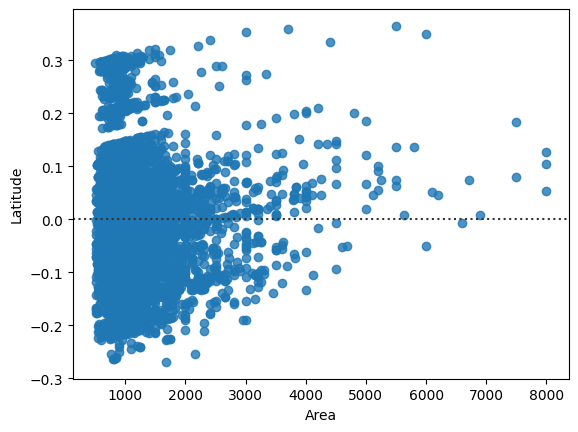

In [44]:
# график остатков
sns.residplot(x = df['Area'], y = df['Latitude'])

In [45]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [46]:
#L1
parameters = {'alpha': np.arange(0.01, 1, 0.01)}

lasso_optimal = GridSearchCV(Lasso(), parameters).fit(X_train, y_train)
lasso_optimal.best_params_

{'alpha': 0.99}

In [47]:
lasso = Lasso(alpha=lasso_optimal.best_params_['alpha']).fit(X_train, y_train)
y_pred = lasso.predict(X_test)

quality_metrics('Простая линейная регрессия + L1', y_test, y_pred)

MAE: 1249.6852410433412
MSE: 4673811.631962045
RMSE: 2161.900005079339
MAPE: 0.82308039108844
R^2: 0.4845165461619362


In [48]:
# L2
parameters = {'alpha': np.arange(0.01, 1, 0.01)}

ridge_optimal = GridSearchCV(Ridge(), parameters).fit(X_train, y_train)
ridge_optimal.best_params_

{'alpha': 0.99}

In [49]:
ridge = Ridge(alpha=ridge_optimal.best_params_['alpha']).fit(X_train, y_train)
y_pred = ridge.predict(X_test)

quality_metrics('Простая линейная регрессия + L2', y_test, y_pred)

MAE: 1249.6852797557824
MSE: 4673811.015081647
RMSE: 2161.8998624084434
MAPE: 0.82308032063309
R^2: 0.48451661419883263


In [50]:
# ElasticNet
parameters = {'alpha': np.arange(0.01, 1, 0.01)}

elastic_optimal = GridSearchCV(ElasticNet(), parameters).fit(X_train, y_train)
elastic_optimal.best_params_

{'alpha': 0.99}

In [51]:
elastic = ElasticNet(alpha=elastic_optimal.best_params_['alpha'], l1_ratio = 0.5).fit(X_train, y_train)
y_pred = elastic.predict(X_test)

quality_metrics('Простая линейная регрессия + ElasticNet', y_test, y_pred)

MAE: 1249.6852012280754
MSE: 4673812.266420647
RMSE: 2161.900151815677
MAPE: 0.8230804635508874
R^2: 0.48451647618630667


In [52]:
metrics

,Regression Model,MAE,MSE,RMSE,MAPE,R2
0,Простая линейная регрессия,1249.685,4673811.015,2161.900,0.823,0.48452
1,Простая линейная регрессия + L1,1249.685,4673811.632,2161.900,0.823,0.48452
2,Простая линейная регрессия + L2,1249.685,4673811.015,2161.900,0.823,0.48452
3,Простая линейная регрессия + ElasticNet,1249.685,4673812.266,2161.900,0.823,0.48452


Применение простой линейной регрессии, что без регуляризаторов, что с ними дало одни и те же результаты, которые оказались плохими. (Lasso немного лучше всех остальных). 

Значит, простая регрессия не подходит для предсказания цены недвижимости в Мумбаи. Перейдем к множественной регрессии

## Multiple (множественная) Linear Regression

In [53]:
X = df.drop(["Price"], axis=1)
X

,Area,Latitude,Longitude,Bedrooms,Bathrooms,Balcony,Neworold,Parking,Furnished_Status,Lift,Type_Of_Building
0,629.0,19.032800,72.896357,2,2,0,1,0,0,0,0
1,974.0,19.032800,72.896357,3,2,0,1,0,0,0,0
2,968.0,19.085600,72.909277,3,3,0,1,0,0,0,0
3,629.0,19.155756,72.846862,2,2,2,1,1,0,1,0
4,1090.0,19.177555,72.849887,2,2,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6250,810.0,19.138320,72.810020,2,2,0,0,0,1,0,0
6251,1400.0,19.221920,72.854250,3,3,1,0,1,0,1,0
6252,750.0,19.144320,72.824111,2,2,0,0,0,0,0,0
6253,700.0,19.047201,72.872225,2,2,0,0,0,2,0,0


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5004, 11), (5004,), (1251, 11), (1251,))

In [55]:
ln = LinearRegression()
ln.fit(X_train, y_train)

LinearRegression()

In [56]:
y_pred = ln.predict(X_test)

quality_metrics('Множественная линейная регрессия', y_test, y_pred)

MAE: 915.2177109435814
MSE: 2684453.3388550435
RMSE: 1638.430144636946
MAPE: 0.7175104758906381
R^2: 0.6753384576110929


In [57]:
print('intercept = ', ln.intercept_, '\n coefficients = ', ln.coef_)

intercept =  713691.3376836623 
 coefficients =  [ 2.08915028e+00 -8.11381564e+03 -7.68737364e+03  3.90124528e+01
  8.16716667e+02  1.10966165e+01  1.50414728e+01 -4.02823818e+01
  1.17351216e+02 -4.02823818e+01 -6.11790347e+01]


C:\Users\seito\AppData\Local\Temp\ipykernel_32764\3218567753.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 =  sns.distplot(y_test, hist=False, color='Red', label='Actual price')
C:\Users\seito\Jupyter Notebook\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\seito\AppData\Local\Temp\ipykernel_32764\3218567753.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to u

<Axes: xlabel='Price', ylabel='Density'>

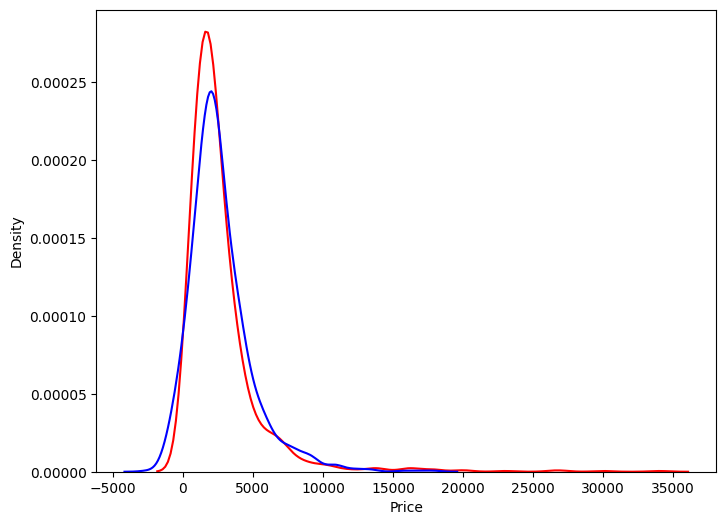

In [58]:
plt.figure(figsize=(8,6))

ax1 =  sns.distplot(y_test, hist=False, color='Red', label='Actual price')
sns.distplot(y_pred, hist=False, color='Blue', ax=ax1, label='Predicted price')

In [59]:
# L1
parameters = {'alpha': np.arange(0.01, 1, 0.01)}

lasso_optimal = RandomizedSearchCV(Lasso(), parameters).fit(X_train, y_train)
lasso_optimal.best_params_

{'alpha': 0.53}

In [60]:
lasso = Lasso(alpha=lasso_optimal.best_params_['alpha']).fit(X_train, y_train)
y_pred = lasso.predict(X_test)

quality_metrics('Множественная линейная регрессия + L1', y_test, y_pred)

MAE: 913.1751927012339
MSE: 2682855.1912830696
RMSE: 1637.9423650675471
MAPE: 0.7147169213867895
R^2: 0.6755317398142783


In [61]:
# L2
parameters = {'alpha': np.arange(0.01, 1, 0.01)}

ridge_optimal = RandomizedSearchCV(Ridge(), parameters).fit(X_train, y_train)
ridge_optimal.best_params_

{'alpha': 0.19}

In [62]:
ridge = Ridge(alpha=ridge_optimal.best_params_['alpha']).fit(X_train, y_train)
y_pred = ridge.predict(X_test)

quality_metrics('Множественная линейная регрессия + L2', y_test, y_pred)

MAE: 914.2124872080763
MSE: 2684047.9626350366
RMSE: 1638.3064312377696
MAPE: 0.7160250485838877
R^2: 0.6753874843782676


In [63]:
parameters = {'alpha': np.arange(0, 1, 0.01)}

elastic_optimal = RandomizedSearchCV(ElasticNet(), parameters).fit(X_train, y_train)
elastic_optimal.best_params_

{'alpha': 0.19}

In [64]:
elastic = ElasticNet(alpha=elastic_optimal.best_params_['alpha'], l1_ratio=0.3).fit(X_train, y_train)
y_pred = elastic.predict(X_test)

quality_metrics('Множественная линейная регрессия + ElasticNet', y_test, y_pred)

MAE: 1068.5279366641284
MSE: 3485529.845464015
RMSE: 1866.9573764454333
MAPE: 0.7769838578314036
R^2: 0.5784551441845637


In [65]:
metrics[4:8]

,Regression Model,MAE,MSE,RMSE,MAPE,R2
4,Множественная линейная регрессия,915.218,2684453.339,1638.430,0.718,0.67534
5,Множественная линейная регрессия + L1,913.175,2682855.191,1637.942,0.715,0.67553
6,Множественная линейная регрессия + L2,914.212,2684047.963,1638.306,0.716,0.67539
7,Множественная линейная регрессия + ElasticNet,1068.528,3485529.845,1866.957,0.777,0.57846


## Полиномиальная регрессия

In [66]:
from sklearn.preprocessing import PolynomialFeatures

In [67]:
p = PolynomialFeatures(2)

X_p=p.fit_transform(X)
X_p

array([[  1.       , 629.       ,  19.0327996, ...,   0.       ,
          0.       ,   0.       ],
       [  1.       , 974.       ,  19.0327996, ...,   0.       ,
          0.       ,   0.       ],
       [  1.       , 968.       ,  19.0856   , ...,   0.       ,
          0.       ,   0.       ],
       ...,
       [  1.       , 750.       ,  19.1443196, ...,   0.       ,
          0.       ,   0.       ],
       [  1.       , 700.       ,  19.0472012, ...,   0.       ,
          0.       ,   0.       ],
       [  1.       , 900.       ,  19.1688179, ...,   0.       ,
          0.       ,   0.       ]])

In [68]:
X_p.shape

(6255, 78)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_p, y, test_size=0.3)

lr2 = LinearRegression().fit(X_train, y_train)

In [70]:
print('intercept = ', lr2.intercept_, '\ncoefficients = ', lr2.coef_)

intercept =  121155209.04740834 
coefficients =  [-4.61419219e-01  8.20873993e+02 -2.70584445e+06 -2.62047387e+06
 -8.83129397e+04  2.57413702e+05 -1.73357137e+04  2.33496441e+04
  2.88046225e+04  4.84363018e+04  2.88046169e+04 -8.33870361e+04
 -1.59759240e-04 -6.00420314e+00 -9.67927759e+00  1.26766534e-01
  3.24472440e-01 -3.19588406e-01  7.59821928e-02  5.70302272e-01
  2.48588226e-01  5.87009247e-01  6.09074948e-01  1.06066139e+03
  3.66890074e+04  3.66266838e+01 -3.50508757e+03  8.71136001e+02
  1.73977411e+02 -1.11884311e+03 -8.12011988e+02 -1.11884281e+03
  2.39962431e+03  1.31879460e+04  1.21034717e+03 -2.61395896e+03
  4.81272637e+02 -6.84315882e+02 -6.86597177e+02 -4.55725016e+02
 -6.86597168e+02  1.65516308e+03 -1.11427502e+02  1.11475896e+02
  3.02827109e+02  1.02851791e+02 -4.25879395e+02 -1.06960566e+02
 -4.25879396e+02 -5.21749410e+01 -3.46342625e+01  5.82032871e+01
 -1.49925001e+02 -1.09242091e+02  9.29845039e+01 -1.09242087e+02
 -1.66568236e+02 -7.05610290e+01 -3.94253

In [71]:
y_pred = lr2.predict(X_test)

quality_metrics('Полиномиальная регрессия', y_test, y_pred)

MAE: 746.9134553878245
MSE: 1854624.4763107751
RMSE: 1361.845981126638
MAPE: 0.5939161825896215
R^2: 0.7713681314211622


C:\Users\seito\AppData\Local\Temp\ipykernel_32764\3218567753.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 =  sns.distplot(y_test, hist=False, color='Red', label='Actual price')
C:\Users\seito\Jupyter Notebook\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\seito\AppData\Local\Temp\ipykernel_32764\3218567753.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to u

<Axes: xlabel='Price', ylabel='Density'>

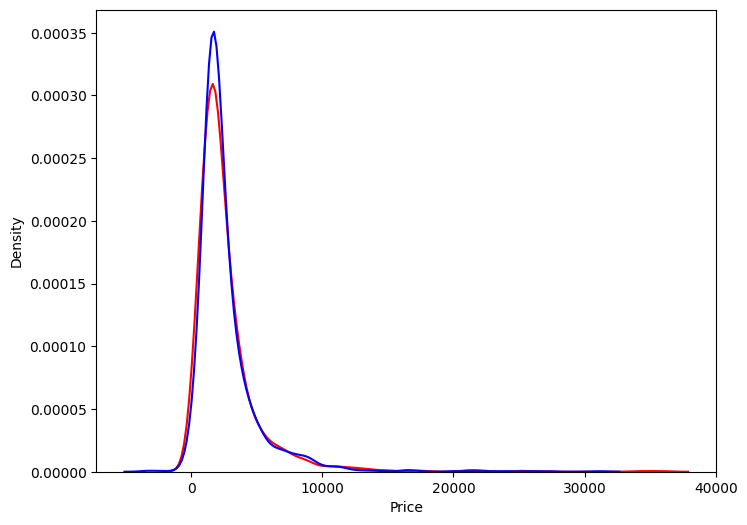

In [72]:
plt.figure(figsize=(8,6))

ax1 =  sns.distplot(y_test, hist=False, color='Red', label='Actual price')
sns.distplot(y_pred, hist=False, color='Blue', ax=ax1, label='Predicted price')

Улучшение результата видно на лицо, давайте попробуем регуляризаторы.

In [73]:
# L1
parameters = {'alpha': np.arange(0, 1, 0.1)}

lasso_optimal = GridSearchCV(Lasso(), parameters).fit(X_train, y_train)
lasso_optimal.best_params_

C:\Users\seito\Jupyter Notebook\venv\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\seito\Jupyter Notebook\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\seito\Jupyter Notebook\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.300e+09, tolerance: 2.629e+06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV inste

{'alpha': 0.9}

In [74]:
lr2 = Lasso(alpha=lasso_optimal.best_params_['alpha']).fit(X_train, y_train)

y_pred = lr2.predict(X_test)

quality_metrics('Полиномиальная регрессия + L1', y_test, y_pred)

MAE: 835.3344415427379
MSE: 2394103.9175262847
RMSE: 1547.2892158631123
MAPE: 0.6545630051523348
R^2: 0.7048629201072676


C:\Users\seito\Jupyter Notebook\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.287e+09, tolerance: 3.341e+06
  model = cd_fast.enet_coordinate_descent(


In [75]:
#L2
parameters = {'alpha': np.arange(0.01, 1, 0.01)}

ridge_optimal = GridSearchCV(Ridge(), parameters).fit(X_train, y_train)
ridge_optimal.best_params_

C:\Users\seito\Jupyter Notebook\venv\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=3.24813e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\seito\Jupyter Notebook\venv\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.92042e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\seito\Jupyter Notebook\venv\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.72588e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\seito\Jupyter Notebook\venv\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.86941e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\seito\Jupyter Noteb

{'alpha': 0.01}

In [76]:
lr2 = Ridge(alpha=ridge_optimal.best_params_['alpha']).fit(X_train, y_train)

y_pred = lr2.predict(X_test)

quality_metrics('Полиномиальная регрессия + L2', y_test, y_pred)

MAE: 765.1265647803727
MSE: 2013648.7708541432
RMSE: 1419.0309266728977
MAPE: 0.5929330411466799
R^2: 0.751764151167863


C:\Users\seito\Jupyter Notebook\venv\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.39947e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [77]:
metrics

,Regression Model,MAE,MSE,RMSE,MAPE,R2
0,Простая линейная регрессия,1249.685,4673811.015,2161.900,0.823,0.48452
1,Простая линейная регрессия + L1,1249.685,4673811.632,2161.900,0.823,0.48452
2,Простая линейная регрессия + L2,1249.685,4673811.015,2161.900,0.823,0.48452
3,Простая линейная регрессия + ElasticNet,1249.685,4673812.266,2161.900,0.823,0.48452
4,Множественная линейная регрессия,915.218,2684453.339,1638.430,0.718,0.67534
5,Множественная линейная регрессия + L1,913.175,2682855.191,1637.942,0.715,0.67553
6,Множественная линейная регрессия + L2,914.212,2684047.963,1638.306,0.716,0.67539
7,Множественная линейная регрессия + ElasticNet,1068.528,3485529.845,1866.957,0.777,0.57846
8,Полиномиальная регрессия,746.913,1854624.476,1361.846,0.594,0.77137
9,Полиномиальная регрессия + L1,835.334,2394103.918,1547.289,0.655,0.70486


In [78]:
def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(min(independent_variable)*0.98, max(independent_variable)*1.01, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price')

    plt.show()
    #plt.close()

            5             4             3            2
-1.508e-14 x + 3.358e-10 x - 2.606e-06 x + 0.008455 x - 7.952 x + 3689


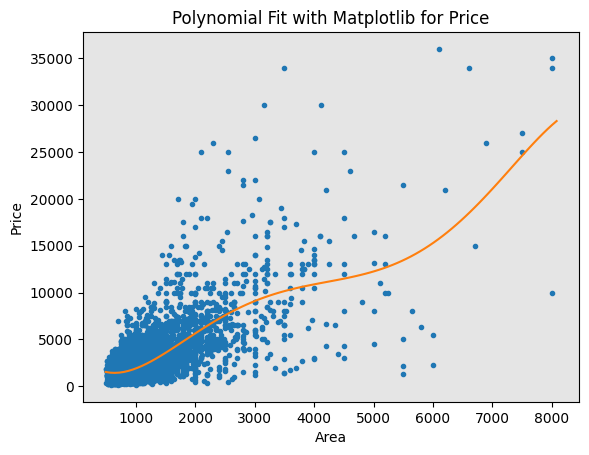

C:\Users\seito\Jupyter Notebook\venv\Lib\site-packages\IPython\core\interactiveshell.py:3526: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


      5            4             3            2
6640 x - 3.83e+05 x + 4.925e+06 x + 9.35e+07 x - 2.706e+09 x + 1.734e+10


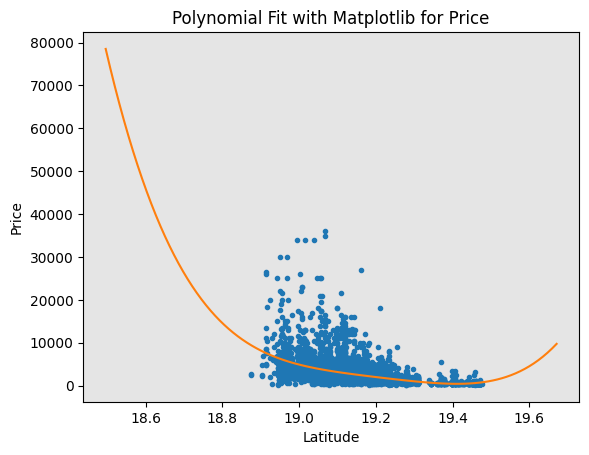

        5       4        3             2
-6.698 x + 239 x - 3071 x + 1.743e+04 x - 4.123e+04 x + 3.546e+04


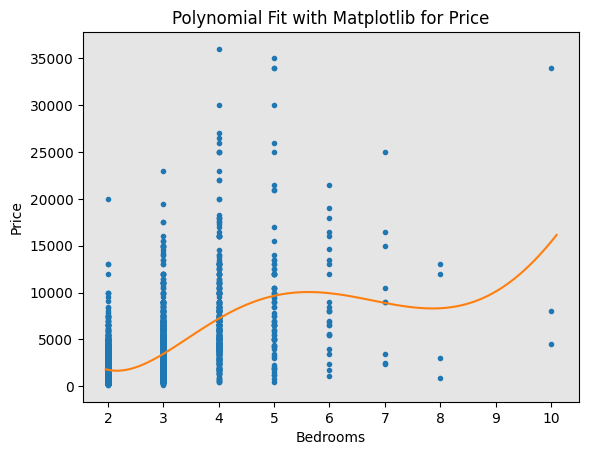

        5         4         3        2
-3.846 x + 79.88 x - 660.7 x + 3030 x - 5133 x + 4060


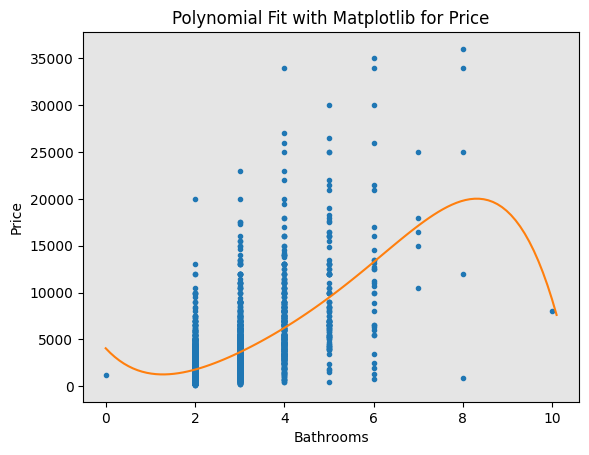

In [79]:
for x in l[1:]:
  pol_loop = np.polyfit(df[x], df['Price'], 5)
  func_loop = np.poly1d(pol_loop)
  print(func_loop)
  plt.figure()
  PlotPolly(func_loop, df[x], Y, Name=x)
  plt.show()

In [80]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler
from sklearn.linear_model import LogisticRegression

In [81]:
X_pipe = df.iloc[:, 4:]
X_train, X_test, y_train, y_test = train_test_split(X_pipe, y, test_size=0.4, shuffle = False, random_state=0)

In [82]:
X_train

,Bedrooms,Bathrooms,Balcony,Neworold,Parking,Furnished_Status,Lift,Type_Of_Building
0,2,2,0,1,0,0,0,0
1,3,2,0,1,0,0,0,0
2,3,3,0,1,0,0,0,0
3,2,2,2,1,1,0,1,0
4,2,2,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
3748,2,2,0,0,0,1,0,0
3749,2,2,0,0,0,0,0,0
3750,2,2,0,0,0,2,0,0
3751,2,2,0,0,0,0,0,0


In [83]:
# Определить Input для pipeline
Input = [('MaxAbsScaler', MaxAbsScaler()), ('polynomial', PolynomialFeatures(degree=2, include_bias=False)), ('model', LinearRegression()) ]
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('MaxAbsScaler', MaxAbsScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [84]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('MaxAbsScaler', MaxAbsScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [85]:
y_pred = pipe.predict(X_test)

quality_metrics('Pipeline для категориальных столбцов', y_test, y_pred)

MAE: 1206.9419901909002
MSE: 4402087.4985172935
RMSE: 2098.1152252717898
MAPE: 0.8533993766187656
R^2: 0.46132432526423683


C:\Users\seito\AppData\Local\Temp\ipykernel_32764\317854582.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(y_test, hist=False, color='Red', label='Actual values')
C:\Users\seito\Jupyter Notebook\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\seito\AppData\Local\Temp\ipykernel_32764\317854582.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use

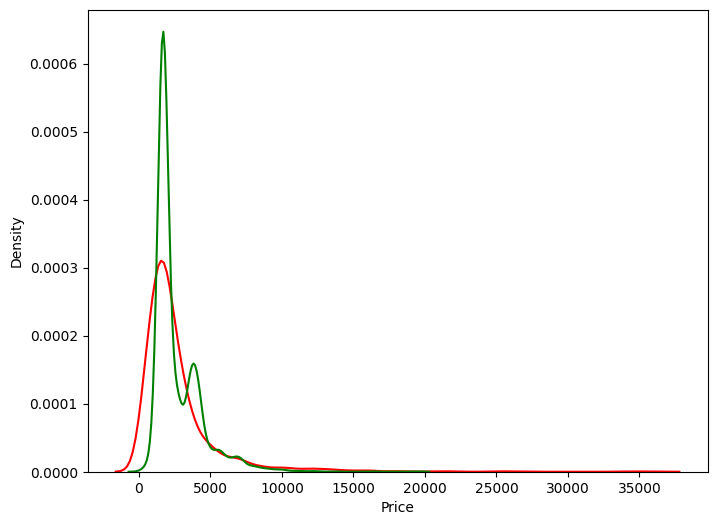

In [86]:
plt.figure(figsize=(8,6))
ax2 = sns.distplot(y_test, hist=False, color='Red', label='Actual values')
sns.distplot(y_pred, hist=False, color='Green', label='Predicted values')
plt.show()

In [87]:
metrics

,Regression Model,MAE,MSE,RMSE,MAPE,R2
0,Простая линейная регрессия,1249.685,4673811.015,2161.900,0.823,0.48452
1,Простая линейная регрессия + L1,1249.685,4673811.632,2161.900,0.823,0.48452
2,Простая линейная регрессия + L2,1249.685,4673811.015,2161.900,0.823,0.48452
3,Простая линейная регрессия + ElasticNet,1249.685,4673812.266,2161.900,0.823,0.48452
4,Множественная линейная регрессия,915.218,2684453.339,1638.430,0.718,0.67534
5,Множественная линейная регрессия + L1,913.175,2682855.191,1637.942,0.715,0.67553
6,Множественная линейная регрессия + L2,914.212,2684047.963,1638.306,0.716,0.67539
7,Множественная линейная регрессия + ElasticNet,1068.528,3485529.845,1866.957,0.777,0.57846
8,Полиномиальная регрессия,746.913,1854624.476,1361.846,0.594,0.77137
9,Полиномиальная регрессия + L1,835.334,2394103.918,1547.289,0.655,0.70486


## Подведём итог по всем регрессиям:
### *Лучше всех справилась полиномиальная регрессия без регуляризаторов!!!!!!!!!!!!!!!!!!!!!!*